In [1]:
library(tidyverse)
library(ggpubr)
library(rstatix)
library(car)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [3]:
setwd('/home/ejam/documents/barley_stacks/preproc/norm_ect/results')
norm <- 'Normalized Size'
d <- 158
TT <- 8
founders <- read.csv(paste('combined_d',d,'_T',TT,'.csv',sep=''))

In [4]:
founders_names_original <- levels(unique(founders$Founder))
founders_names <- founders_names_original
founders_names[5] <- 'CA Mariout'
founders_names[11] <- 'Good Delta'
founders_names[17] <- 'Maison Carree'
founders_names[24] <- 'Palmella Blue'
founders_names[28] <- 'WI Winter'
print(founders_names)

 [1] "Algerian"        "Alpha"           "Arequipa"        "Atlas"          
 [5] "CA Mariout"      "Club Mariout"    "Everest"         "Flynn"          
 [9] "Glabron"         "Golden Pheasant" "Good Delta"      "Han River"      
[13] "Hannchen"        "Horn"            "Lion"            "Lyallpur"       
[17] "Maison Carree"   "Manchuria"       "Meloy"           "Minia"          
[21] "Multan"          "Oderbrucker"     "Orel"            "Palmella Blue"  
[25] "Sandrel"         "Trebi"           "White Smyrna"    "WI Winter"      


In [13]:
dim(founders)

meta_info <- colnames(founders)[1:9]
print(meta_info)
trad_traits <- colnames(founders)[10:20]
print(trad_traits)
topo_traits <- colnames(founders)[21:ncol(founders)]
print(topo_traits[1:10])

[1] 3121 1284

[1] "Scan"            "Color"           "Generation"      "Selection"      
[5] "Progeny"         "Label..C.G.S.P." "Founder"         "Label"          
[9] "Tag"            
 [1] "Length"          "Width"           "Height"          "HeightMax"      
 [5] "Shell"           "Area"            "Vol"             "ConvexArea"     
 [9] "ConvexVol"       "ConvexAreaRatio" "ConvexVolRatio" 
 [1] "X7"  "X15" "X23" "X31" "X39" "X47" "X55" "X63" "X71" "X79"


In [19]:
trad <- founders[c('Founder',trad_traits)]
utils::head(trad)

,Founder,Length,Width,Height,HeightMax,Shell,Area,Vol,ConvexArea,ConvexVol,ConvexAreaRatio,ConvexVolRatio
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Atlas,82.15945,47.84965,34.13562,36.91235,7715,13772,66927,9097.258,68787.67,1.51386,0.97295
2,Atlas,77.96905,38.98826,31.59553,33.75345,6263,11876,52632,7686.215,53353.33,1.54510,0.98648
3,Atlas,73.92173,41.98139,32.21753,36.05923,6301,11400,52637,7563.551,53522.83,1.50723,0.98345
4,Atlas,79.44825,42.68680,34.10396,36.59038,7157,12474,60547,8394.334,61666.67,1.48600,0.98184
5,Atlas,81.29421,47.44167,35.25533,38.60691,7514,13938,66725,9003.033,68338.83,1.54814,0.97638
6,Atlas,83.42958,44.80172,35.24465,38.03556,7832,13780,69815,9172.594,70493.83,1.50230,0.99037


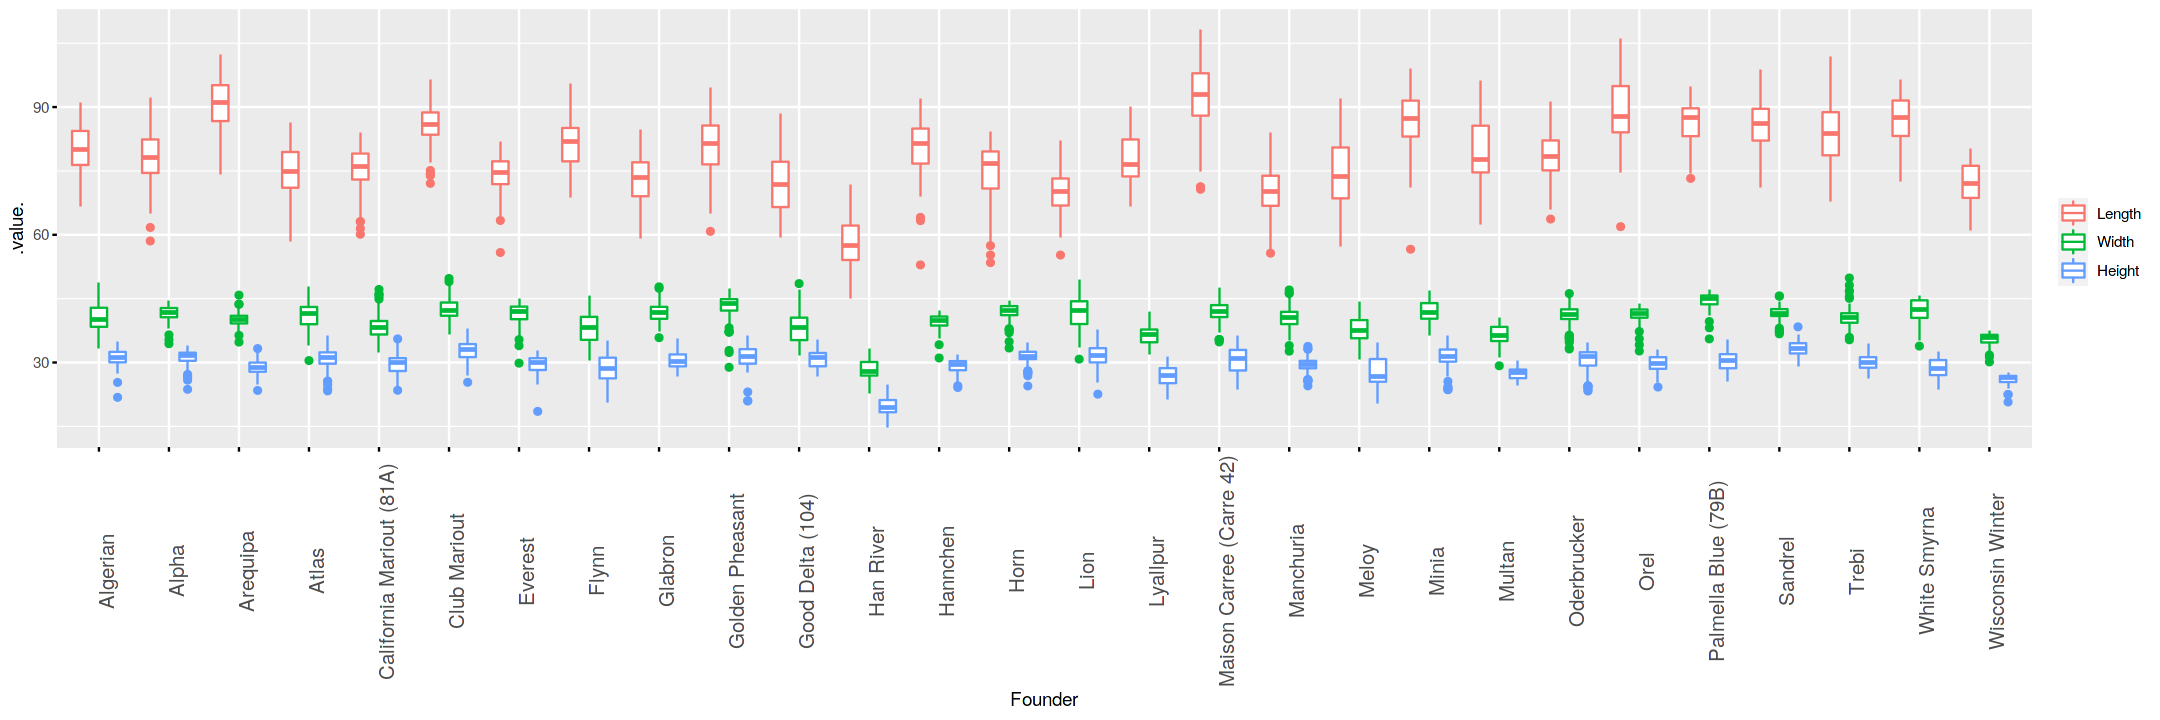

In [32]:
options(repr.plot.width=18, repr.plot.height=6)
ggpubr::ggboxplot(
    trad, x='Founder', y=c('Length', 'Width','Height'),
    merge = TRUE,
    ggtheme = theme(axis.text.x = element_text(size=12, angle=90))
)

In [39]:
trad %>% 
    dplyr::group_by(Founder) %>%
    rstatix::get_summary_stats(Length, Width, Height, type='mean_sd')

Founder,variable,n,mean,sd
<fct>,<chr>,<dbl>,<dbl>,<dbl>
Algerian,Height,144,31.123,1.909
Algerian,Length,144,80.281,5.357
Algerian,Width,144,40.378,2.786
Alpha,Height,90,31.130,1.844
Alpha,Length,90,78.229,6.568
Alpha,Width,90,41.434,1.961
Arequipa,Height,110,28.914,1.724
Arequipa,Length,110,90.802,5.966
Arequipa,Width,110,40.057,1.657


In [41]:
trad %>% 
    dplyr::group_by(Founder) %>%
    dplyr::summarize(N=n())

`summarise()` ungrouping output (override with `.groups` argument)



Founder,N
<fct>,<int>
Algerian,144
Alpha,90
Arequipa,110
Atlas,132
California Mariout (81A),189
Club Mariout,173
Everest,128
Flynn,78
Glabron,114


In [45]:
trad %>% 
    dplyr::group_by(Founder) %>%
    rstatix::shapiro_test(Length, Width, Height) %>%
    dplyr::arrange(variable)

Founder,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
Algerian,Height,0.9539124,9.953621e-05
Alpha,Height,0.8989427,3.631039e-06
Arequipa,Height,0.9889753,5.126526e-01
Atlas,Height,0.9737884,1.174823e-02
California Mariout (81A),Height,0.9815668,1.362151e-02
Club Mariout,Height,0.9861940,8.645290e-02
Everest,Height,0.9039740,1.512944e-07
Flynn,Height,0.9814698,3.153161e-01
Glabron,Height,0.9837910,1.849988e-01


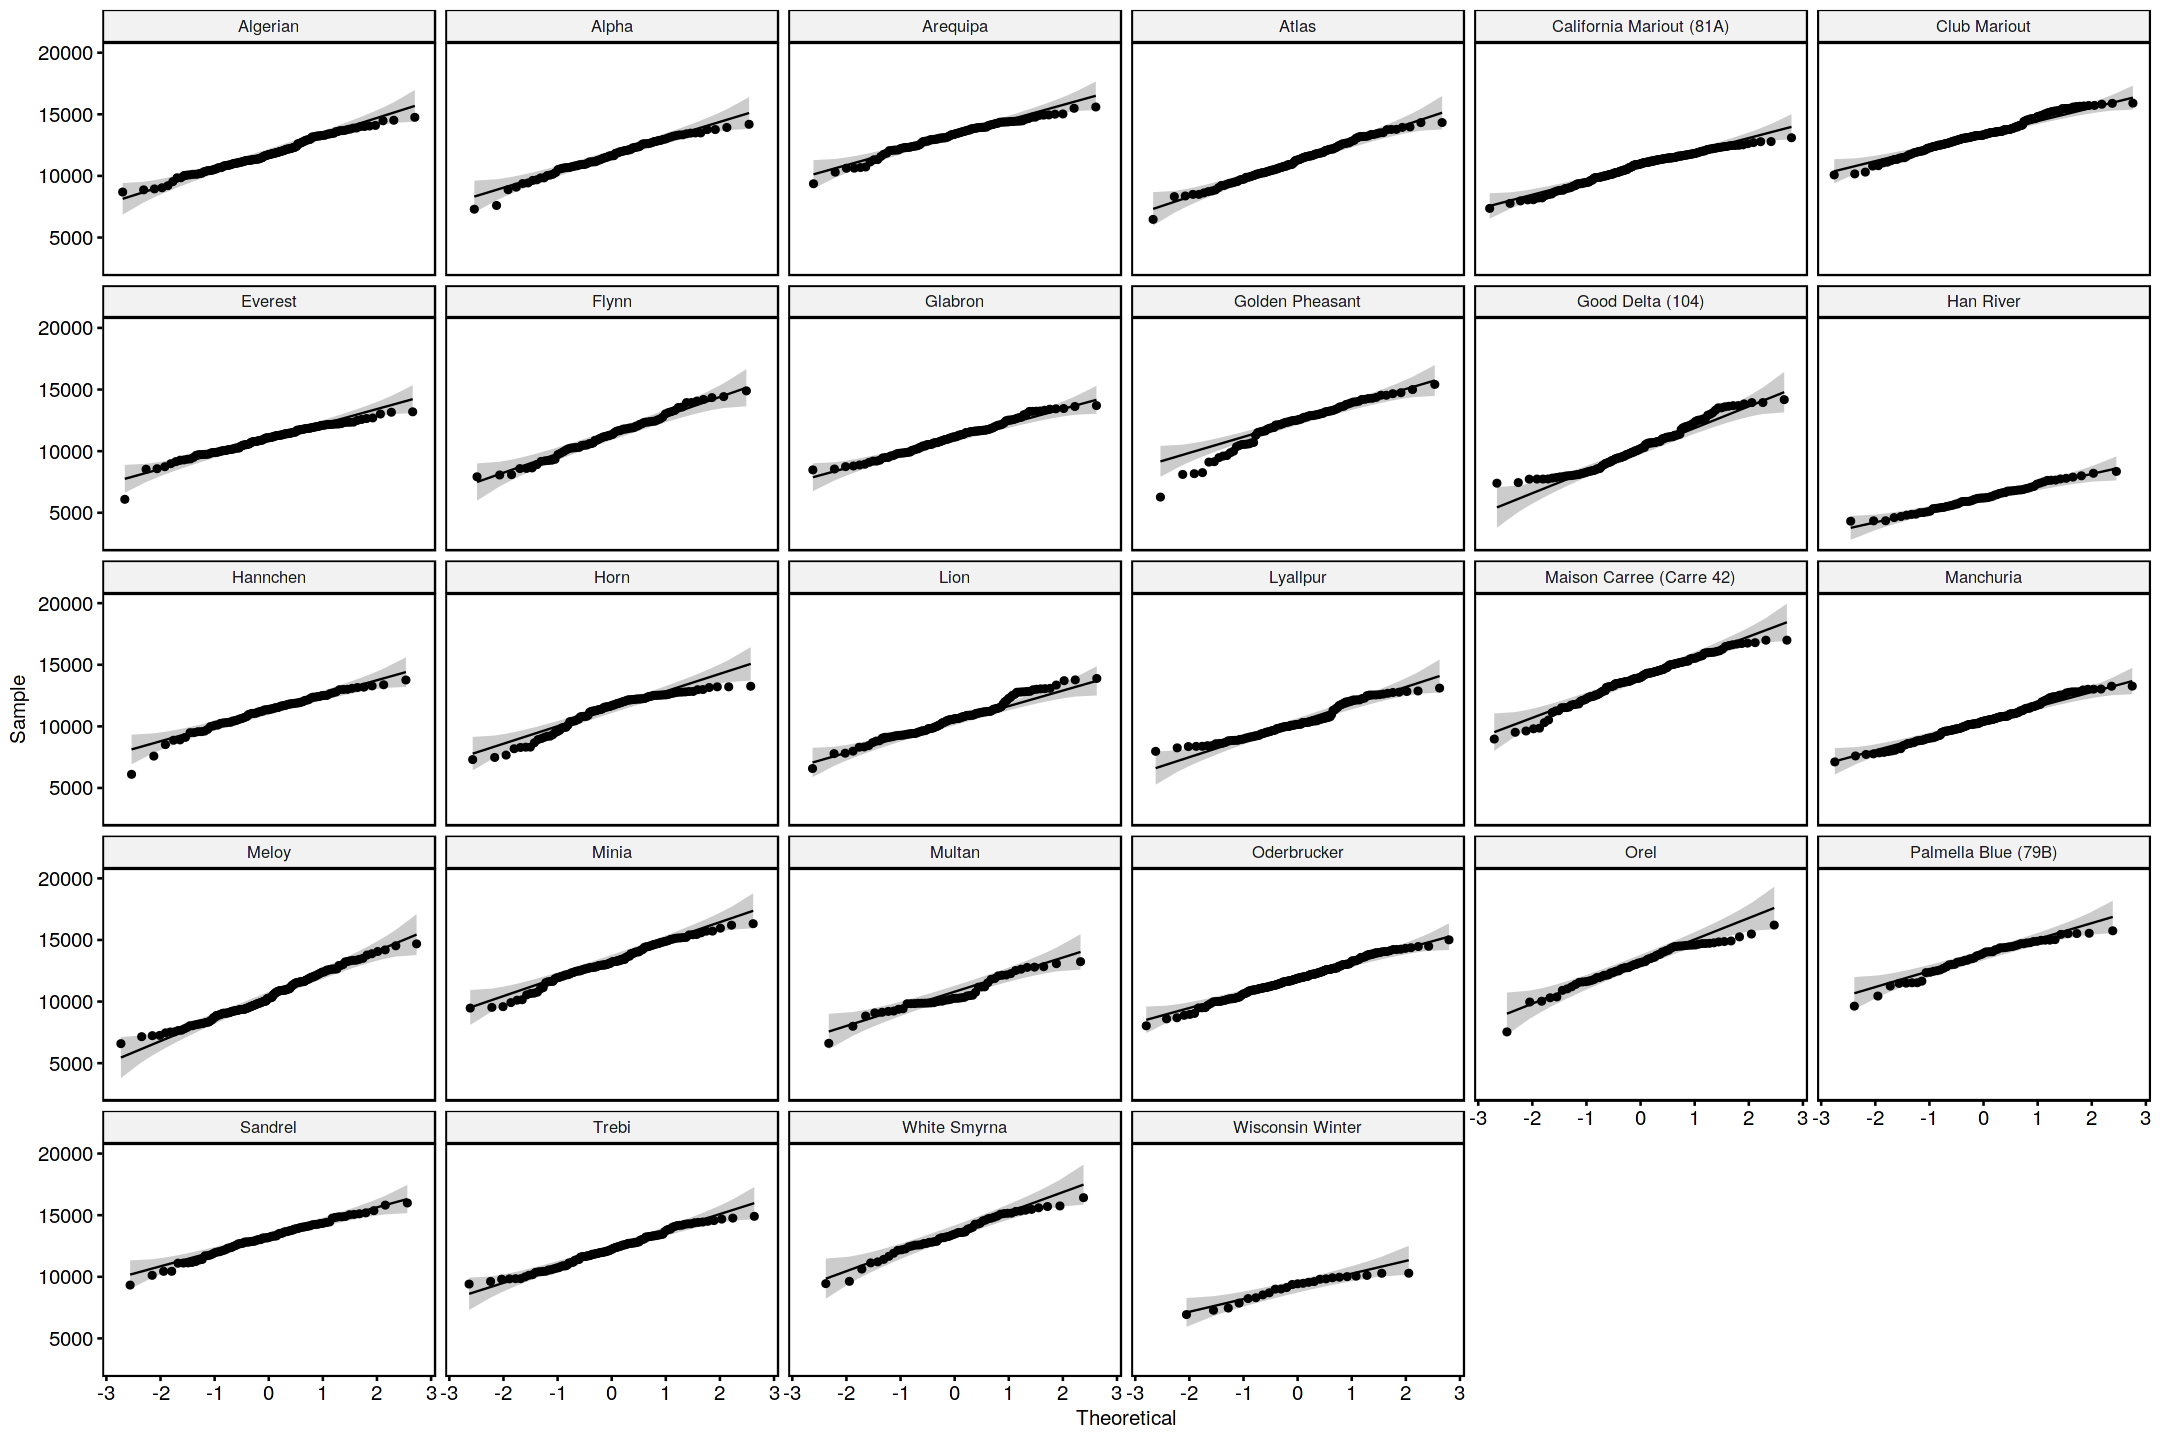

In [59]:
options(repr.plot.width=18, repr.plot.height=12)
ggpubr::ggqqplot(trad, 'Area', facet.by='Founder')

In [54]:
trad %>%
    dplyr::select(Length, Height, Width) %>%
    rstatix::mshapiro_test()

statistic,p.value
<dbl>,<dbl>
0.9344936,5.134766e-35


In [55]:
trad %>% rstatix::cor_test(Length, Height, Width)

var1,var2,cor,statistic,p,conf.low,conf.high,method
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Length,Length,1.00,Inf,0.00e+00,1.0000000,1.0000000,Pearson
Length,Height,0.47,29.33930,2.64e-167,0.4371179,0.4921267,Pearson
Length,Width,0.61,42.91601,1.19e-316,0.5867768,0.6309161,Pearson
Height,Length,0.47,29.33930,2.64e-167,0.4371179,0.4921267,Pearson
Height,Height,1.00,Inf,0.00e+00,1.0000000,1.0000000,Pearson
Height,Width,0.77,68.06718,0.00e+00,0.7585744,0.7868281,Pearson
Width,Length,0.61,42.91601,1.19e-316,0.5867768,0.6309161,Pearson
Width,Height,0.77,68.06718,0.00e+00,0.7585744,0.7868281,Pearson
Width,Width,1.00,Inf,0.00e+00,1.0000000,1.0000000,Pearson


In [61]:
model <- lm(cbind(Width, Area, Vol) ~ Founder, trad)
car::Manova(model, test.statistic = "Pillai")


Type II MANOVA Tests: Pillai test statistic
        Df test stat approx F num Df den Df    Pr(>F)    
Founder 27    1.3552   94.389     81   9279 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [62]:
model


Call:
lm(formula = cbind(Width, Area, Vol) ~ Founder, data = trad)

Coefficients:
                                 Width       Area        Vol       
(Intercept)                       4.038e+01   1.181e+04   5.229e+04
FounderAlpha                      1.056e+00  -1.981e+02  -2.660e+02
FounderArequipa                  -3.208e-01   1.453e+03   6.743e+03
FounderAtlas                      6.043e-01  -5.805e+02  -1.664e+03
FounderCalifornia Mariout (81A)  -2.111e+00  -1.065e+03  -7.066e+03
FounderClub Mariout               2.143e+00   1.591e+03   9.384e+03
FounderEverest                    9.212e-01  -8.471e+02  -5.124e+03
FounderFlynn                     -2.233e+00  -4.827e+02  -4.619e+03
FounderGlabron                    1.414e+00  -6.850e+02  -2.810e+03
FounderGolden Pheasant            2.566e+00   4.569e+02   3.391e+03
FounderGood Delta (104)          -2.225e+00  -1.488e+03  -7.697e+03
FounderHan River                 -1.209e+01  -5.580e+03  -3.270e+04
FounderHannchen                  

In [64]:
grouped.data <- trad %>%
  gather(key = "variable", value = "value", Width, Area, Vol) %>%
  group_by(variable)

In [66]:
grouped.data %>% kruskal_test(value ~ Founder)

,variable,.y.,n,statistic,df,p,method
,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<chr>
1,Area,value,3121,1421.504,27,5.56e-283,Kruskal-Wallis
2,Vol,value,3121,1323.534,27,4.29e-262,Kruskal-Wallis
3,Width,value,3121,1212.930,27,1.50e-238,Kruskal-Wallis


In [67]:
grouped.data %>% anova_test(value ~ Founder)

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()

Coefficient covariances computed by hccm()



,variable,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Area,Founder,27,3093,119.932,0,*,0.511
2,Vol,Founder,27,3093,107.003,0,*,0.483
3,Width,Founder,27,3093,117.261,0,*,0.506
